Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

In [118]:
# Import libraries for data processing
# -----------------------------------------------------------------------
import pandas as pd  # Pandas for data manipulation and analysis in Python.

# Optional libraries (can be removed if not used):
# -----------------------------------------------------------------------
# Import libraries for web scraping and data manipulation
# from bs4 import BeautifulSoup
# import requests

# Import libraries for web browser automation with Selenium
# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager

# ChromeDriverManager manages the installation of the Chrome driver

# from selenium.webdriver.common.keys import Keys  # Keys is useful for simulating keyboard events in Selenium.
# from selenium.webdriver.support.ui import Select  # Select is used to interact with <select> elements on web pages.

# Import libraries for pausing execution
# -----------------------------------------------------------------------
# from time import sleep  # Sleep is used to pause the program execution for a number of seconds.

# Configurations
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)  # Set a Pandas option to show all columns of a DataFrame.

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


pd.options.display.max_columns = None

pd.set_option('display.float_format', '{:.2f}'.format)

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt



In [119]:
# Load the two datasets into separate DataFrames
activity = pd.read_csv("files/Customer Flight Activity.csv")
loyalty = pd.read_csv("files/Customer Loyalty History.csv")

In [120]:
# Creation of a function to explore the DataFrames
def explore_df(df):
    """
    This function allows to make an initial data exploration. 

    Args:
      df (pandas.DataFrame): The DataFrame to explore. Refering to the ones previously opened. 

    Returns:
      None  
      """
    # Prints information about the DataFrame
    print("The main information for DataFrame is: ")
    df.info()
    print("______________________")
    # Print the first 5 rows of the DataFrame
    print(f"The first 5 rows for DataFrame are:")
    display(df.head())


In [121]:
explore_df(activity)

The main information for DataFrame is: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
______________________
The first 5 rows for DataFrame are:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.00,0,0
1,100102,2017,1,10,4,14,2030,203.00,0,0
2,100140,2017,1,6,0,6,1200,120.00,0,0
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0


In [122]:
explore_df(loyalty)

The main information for DataFrame is: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation 

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.00,1.00
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.00,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [123]:
# Creation of a function to obtain further information
def df_information(df):
    #Prints the shape of the DataFrame 
    print(f"The shape for the DataFrame is: ")
    print(df.shape)
    print("_________________")
    #Prints the list of column names
    print(f"The name of the columns are: {list(df.columns)}")
    print("_________________")
    #Prints the nulls
    print(f"The number of nulls in the DataFrame:")
    print(df.isna().sum())
    print("_________________")
    print(f"The number of values duplicated in the DataFrame:")
    print(df.duplicated().sum())
    print("_________________")
    #Prints the transposed descriptive statistics
    print(f"The descriptive statististcs for this DataFrame are:")
    display(df.describe().T)



In [124]:
df_information(activity)

The shape for the DataFrame is: 
(405624, 10)
_________________
The name of the columns are: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']
_________________
The number of nulls in the DataFrame:
Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64
_________________
The number of values duplicated in the DataFrame:
1864
_________________
The descriptive statististcs for this DataFrame are:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.00,550037.87,258935.29,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.00,4.12,5.23,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.00,1.03,2.08,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.00,5.15,6.52,0.00,0.00,1.00,10.00,32.00
Distance,405624.00,1208.88,1433.16,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.00,123.69,146.60,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.00,30.70,125.49,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.00,2.48,10.15,0.00,0.00,0.00,0.00,71.00


In [125]:
df_information(loyalty)

The shape for the DataFrame is: 
(16737, 16)
_________________
The name of the columns are: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']
_________________
The number of nulls in the DataFrame:
Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64
_________________
The number of values duplicated in the DataFrame:
0
_________________
The descriptive statististcs for this DataFrame are:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.00,549735.88,258912.13,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.00,79245.61,35008.30,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.00,7988.90,6860.98,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.00,2015.25,1.98,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.00,6.67,3.40,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.00,2016.50,1.38,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.00,6.96,3.46,1.00,4.00,7.00,10.00,12.00


In [166]:
duplicates = activity.duplicated()

In [165]:
duplicates

1864

In [167]:
duplicates = activity[activity.duplicated()]

In [139]:
display(duplicates)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.00,0,0
227,112142,2017,1,0,0,0,0,0.00,0,0
478,126100,2017,1,0,0,0,0,0.00,0,0
567,130331,2017,1,0,0,0,0,0.00,0,0
660,135421,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.00,0,0
404884,960050,2018,12,0,0,0,0,0.00,0,0
405111,971370,2018,12,0,0,0,0,0.00,0,0
405410,988392,2018,12,0,0,0,0,0.00,0,0


In [170]:
for client in activity["Loyalty Number"]:
    if client in duplicates:
        pass
    else:
        print(client)
        

100018
100102
100140
100214
100272
100301
100364
100380
100428
100504
100550
863070
100590
100642
100644
100646
100727
100737
100753
100816
100853
100883
100890
101018
101148
101356
101363
691626
101515
101540
101544
101547
101581
101594
101644
101663
101664
100504
101768
100504
101895
101902
101902
101945
102168
102184
102207
102299
102308
102311
102376
102464
102615
102726
102730
102740
102788
159942
102877
102982
103043
103151
103217
103304
103340
103352
103359
103362
103383
103436
103490
103502
103536
103699
103731
103758
103823
103860
103862
103916
103969
103970
103975
103985
104103
104267
104353
627915
100504
104586
104673
104732
104739
104849
104960
105063
105073
105074
105145
105193
105214
100504
471706
105352
105552
105688
105700
105712
105789
105835
105841
105921
105932
105992
106001
106001
106037
106038
106046
106048
107119
106397
106444
106477
100504
100504
106589
106592
106616
106623
106637
106689
516133
106757
106776
106838
106839
106936
444931
106964
106978
106979
107037

KeyboardInterrupt: 

In [169]:
activity[activity["Loyalty Number"] == 100018] #selecciono ejemplo para analizar información duplicado. Aparentemente se corresponde a la misma persona a diferencia de la columna 'remotework'

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.00,0,0
16901,100018,2017,2,2,2,4,1320,132.00,0,0
46353,100018,2018,10,6,4,10,3110,311.00,385,31
50703,100018,2017,4,4,0,4,924,92.00,0,0
67604,100018,2017,5,0,0,0,0,0.00,0,0
84505,100018,2017,6,4,1,5,4330,433.00,0,0
101406,100018,2017,7,10,0,10,3870,387.00,0,0
135208,100018,2017,9,9,4,13,1651,165.00,0,0
142774,100018,2017,8,10,5,15,4200,420.00,690,56
152109,100018,2017,10,6,0,6,1032,103.00,0,0


In [ ]:
# Merges the both DataFrames
df_all = activity.merge(loyalty, how='inner', on= "Loyalty Number")

In [ ]:
explore_df(df_all)

The main information for DataFrame is: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City              

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.00,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.00,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.00,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.00,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.00,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN


In [ ]:
df_information(df_all)

The shape for the DataFrame is: 
(405624, 25)
_________________
The name of the columns are: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']
_________________
The number of nulls in the DataFrame:
Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                      

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.00,550037.87,258935.29,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.00,4.12,5.23,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.00,1.03,2.08,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.00,5.15,6.52,0.00,0.00,1.00,10.00,32.00
Distance,405624.00,1208.88,1433.16,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.00,123.69,146.60,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.00,30.70,125.49,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.00,2.48,10.15,0.00,0.00,0.00,0.00,71.00


In [ ]:
# Creates an empty list to store the columns with nulls
columns_with_nulls = []
def filtering_nulls(df):
    # Iterates through each column in the DataFrame
    for column in df.columns:
        # Check if the column has any null values using 'isnull().any()'
        if df[column].isnull().any():
            # If null are found, appends the column name to the list
            columns_with_nulls.append(column)
    # Returns the list of columns with nulls
    return columns_with_nulls


In [ ]:
filtering_nulls(df_all)



['Salary', 'Cancellation Year', 'Cancellation Month']

In [ ]:
(df_all[columns_with_nulls].isna().sum()/df_all.shape[0]) * 100

Salary               25.31
Cancellation Year    87.66
Cancellation Month   87.66
dtype: float64

In [ ]:
#Converts any number to its positive equivalent.
def to_positive(number):
    # Checks if the number is negative:
    if number < 0:
        # If negative transforms it
        return np.abs(number)
    # If the number is already non-negative returns it as is
    else:
        return number

In [ ]:
df_all["Salary"] = df_all["Salary"].apply(to_positive)

Text(0.5, 1.0, "Violinplot usando la columna `salary'")

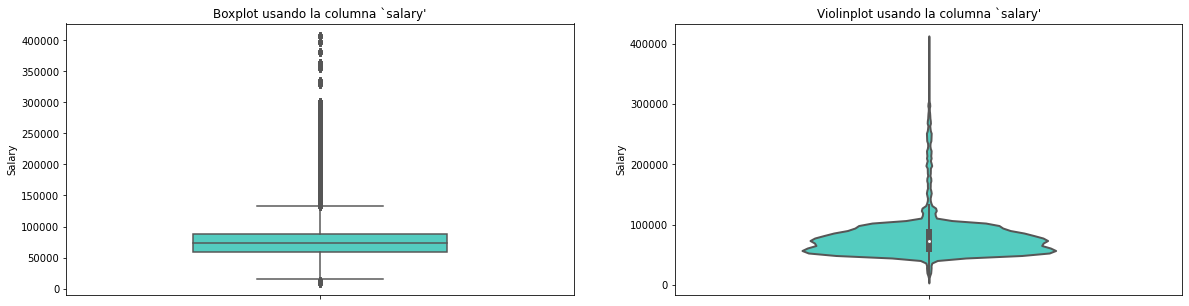

In [ ]:
# Creates a figure and two subplots (1 row, 2 columns) with a size of 20x5 inches

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Creates a boxplot on the first subplot
sns.boxplot(y = "Salary",
            data = df_all, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])

axes[0].set_title("Boxplot usando la columna `salary'")



# Creates a violinplot on the second subplot
sns.violinplot(y = "Salary",
               data = df_all, 
               width = 0.5, 
               color = "turquoise", 
               linewidth = 2, 
               ax = axes[1])


axes[1].set_title("Violinplot usando la columna `salary'")



In [ ]:
df_copia = df_all.copy()

In [ ]:

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["Salary"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[92552.],
       [92552.],
       [92552.],
       ...,
       [75616.],
       [75616.],
       [75616.]])

In [ ]:
df_copia["salary"] = imputer_iterative_imputado


In [ ]:

# instanciamos la clase del KNNImputer
#imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
#imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["Salary"]])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
#imputer_knn_imputado

In [ ]:
df_copia.describe()["Salary"]

count   302952.00
mean     79381.44
std      34735.90
min       9081.00
25%      59262.00
50%      73479.00
75%      88612.00
max     407228.00
Name: Salary, dtype: float64

In [ ]:
Cancellation Year/Cancellation Month (eliminar columnas)

SyntaxError: invalid syntax (1296823118.py, line 1)